
## Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

### Definitions
- **K-Means**: A centroid-based algorithm that partitions data into K clusters by minimizing within-cluster variance.
- **Hierarchical Clustering**: Builds a tree (dendrogram) of clusters either bottom-up (agglomerative) or top-down (divisive).

###  Working (Step-by-Step)
**K-Means**
1. Choose `K` (number of clusters).  
2. Initialize `K` centroids (random or k-means++).  
3. **Assign** each point to its nearest centroid.  
4. **Update** centroids as the mean of assigned points.  
5. Repeat steps 3–4 until convergence (centroids stop moving).

**Agglomerative Hierarchical**
1. Start with each point as its own cluster.  
2. Repeatedly merge the two closest clusters using a linkage rule (e.g., ward, average).  
3. Stop when one cluster remains; cut the dendrogram at a chosen level to get clusters.

###  Advantages vs  Disadvantages
| Aspect | K-Means | Hierarchical |
|---|---|---|
| Need `K` upfront |  Clear target |  Not required (decide later by cutting dendrogram) |
| Speed/Scalability |  Fast on large data |  O(n²) memory/time; struggles with big data |
| Shape of clusters |  Prefers spherical | Can capture complex shapes (depends on linkage) |
| Outliers |  Sensitive |  Also sensitive but effect visible in dendrogram |
| Visualization | Centroids, scatter | Dendrogram + clusters |

###  Summary
- Choose **K-Means** for speed and large, roughly spherical clusters when `K` is known.  
- Choose **Hierarchical** when **structure exploration** and **visual dendrograms** are valuable.



## Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

### Definition
The **Silhouette Score** measures how similar a point is to its own cluster (**cohesion**) compared to other clusters (**separation**).  
Values range from **-1 to 1**:  
- **~1** → well-clustered; far from other clusters.  
- **~0** → overlapping clusters.  
- **< 0** → likely misassigned.

###  Formula (per sample)
- **a(i)**: average distance from point *i* to points within the same cluster.  
- **b(i)**: minimum average distance from point *i* to points in other clusters.  
- **s(i) = (b(i) - a(i)) / max(a(i), b(i))**.  
Overall score is the mean over all samples.

###  Why it’s useful
- Model selection (e.g., choose **K**).  
- Compare different algorithms (K-Means vs DBSCAN vs Hierarchical).  
- Detect poor clustering (scores near 0 or negative).  



##  Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

- **eps (ε)**: Neighborhood radius around a point. Larger `eps` → clusters merge; too small → many points become noise.  
- **min_samples**: Minimum number of points within `eps` (including the point itself) to qualify as a **core** point. Larger values → stricter cluster formation.  
- **metric**: Distance function (default: Euclidean). Different metrics change neighborhood shape.

###  How DBSCAN works (quickly)
- **Core point**: ≥ `min_samples` points within `eps`.  
- **Border point**: within `eps` of a core point but has < `min_samples` neighbors.  
- **Noise**: neither core nor border.  
Clusters are formed by **density reachability** from core points.



##  Question 4: Why is feature scaling important for K-Means and DBSCAN?

- Distance-based algorithms are **scale-sensitive**. Features with larger scales can dominate Euclidean distances.  
- **K-Means**: centroid updates and assignments rely on distances → unscaled features skew clusters.  
- **DBSCAN**: `eps` operates in feature space → inconsistent density if features are on different scales.

###  Best practice
- Use **StandardScaler** (mean 0, std 1) or **MinMaxScaler** before clustering.  
- For mixed data types, consider encoding + scaling or specialized distance metrics.



## Question 5: What is the Elbow Method in K-Means and how does it help choose K?

- Compute K-Means for a range of **K** values (e.g., 1–10).  
- Track **inertia** (sum of squared distances to nearest centroid).  
- Plot **K vs inertia** and look for the **"elbow"** point where adding more clusters yields **diminishing returns**.  
- Pick **K at or just after the elbow**.


In [1]:

# Common Imports (Run once)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Reproducibility
rng = np.random.RandomState(42)



##  Question 6: make_blobs → KMeans → visualize with centers


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


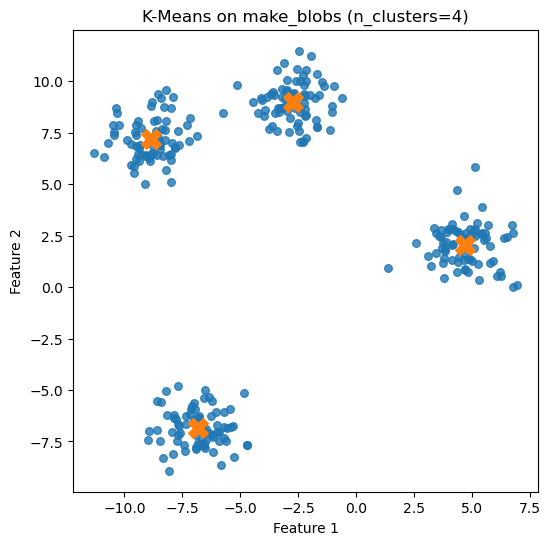

In [2]:

# Generate synthetic dataset
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_blobs)

# Plot clusters and centers
plt.figure(figsize=(6, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=30, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200)
plt.title("K-Means on make_blobs (n_clusters=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

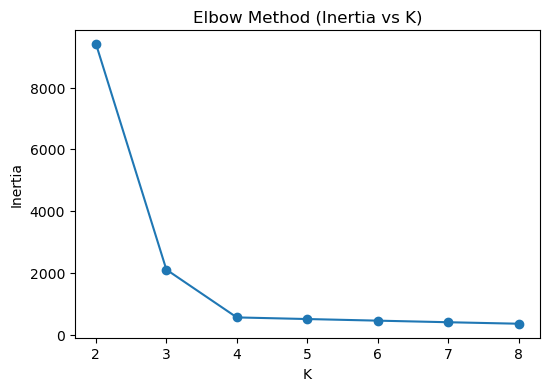

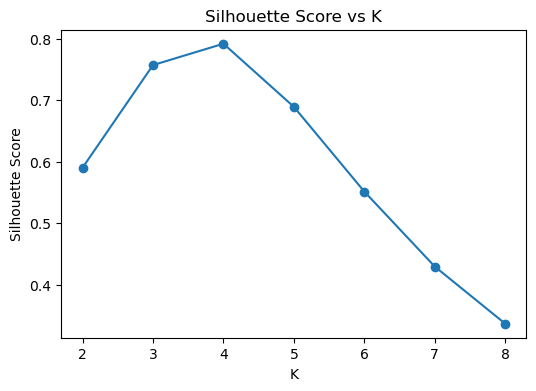

In [3]:

# (Optional) Silhouette on the same data for K=2..8 + Elbow
inertias = []
sil_scores = []
Ks = range(2, 9)
for K in Ks:
    km = KMeans(n_clusters=K, random_state=42, n_init=10)
    lbl = km.fit_predict(X_blobs)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_blobs, lbl))

# Elbow plot (K vs Inertia)
plt.figure(figsize=(6, 4))
plt.plot(list(Ks), inertias, marker='o')
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

# Silhouette score vs K
plt.figure(figsize=(6, 4))
plt.plot(list(Ks), sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()



## Question 7: Wine → StandardScaler → DBSCAN → count clusters (exclude noise)


In [4]:

# Load wine data and scale
wine = load_wine()
X_wine = wine.data
X_wine_scaled = StandardScaler().fit_transform(X_wine)

# Train DBSCAN (simple starting point; parameters can be tuned)
db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(X_wine_scaled)

# Count clusters excluding noise (-1 is noise)
unique_labels = set(db_labels)
n_clusters = len([lab for lab in unique_labels if lab != -1])

print("DBSCAN labels (first 20):", db_labels[:20])
print("Number of clusters (excluding noise):", n_clusters)


DBSCAN labels (first 20): [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Number of clusters (excluding noise): 0



## Question 8: make_moons → DBSCAN → highlight outliers


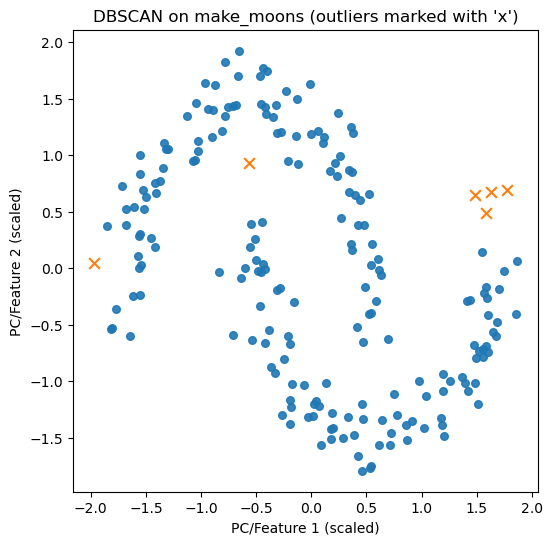

In [5]:

# Generate moon-shaped data
X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale (DBSCAN benefits from scaling)
X_moons_scaled = StandardScaler().fit_transform(X_moons)

# DBSCAN suited for non-linear shapes
db_moons = DBSCAN(eps=0.3, min_samples=5)
labels_moons = db_moons.fit_predict(X_moons_scaled)

# Identify outliers
outliers = labels_moons == -1

# Plot clusters and outliers
plt.figure(figsize=(6, 6))
plt.scatter(X_moons_scaled[~outliers, 0], X_moons_scaled[~outliers, 1], s=30, alpha=0.9)
plt.scatter(X_moons_scaled[outliers, 0], X_moons_scaled[outliers, 1], s=60, marker='x')
plt.title("DBSCAN on make_moons (outliers marked with 'x')")
plt.xlabel("PC/Feature 1 (scaled)")
plt.ylabel("PC/Feature 2 (scaled)")
plt.show()



##  Question 9: Wine → PCA(2D) → Agglomerative → 2D scatter


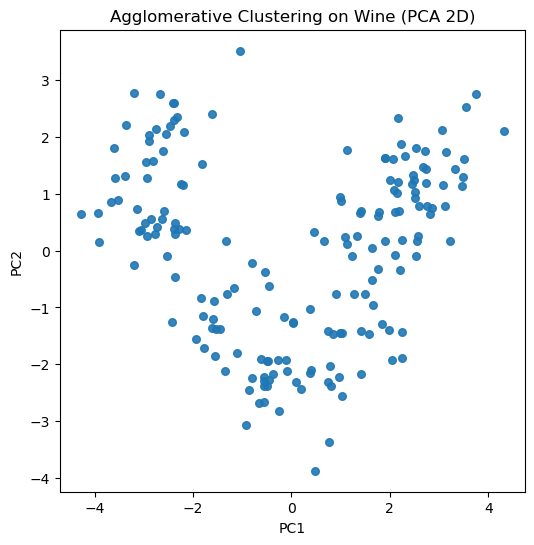

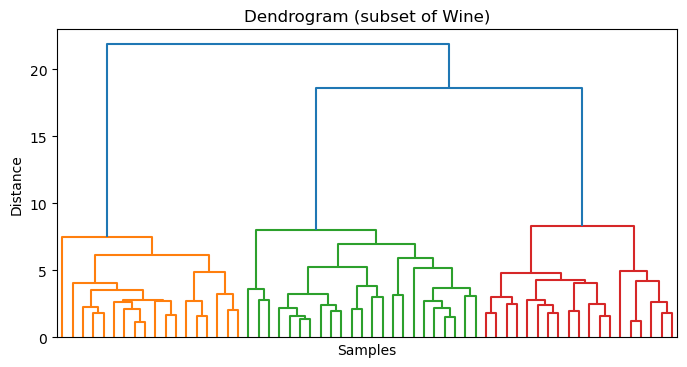

In [6]:

# PCA to 2D
pca = PCA(n_components=2, random_state=42)
X_wine_2d = pca.fit_transform(X_wine_scaled)

# Agglomerative (Ward requires Euclidean distance)
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X_wine_2d)

# Plot 2D clusters
plt.figure(figsize=(6, 6))
plt.scatter(X_wine_2d[:, 0], X_wine_2d[:, 1], s=30, alpha=0.9)
plt.title("Agglomerative Clustering on Wine (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Optional dendrogram on a small subset (for speed & readability)
subset_idx = np.random.choice(X_wine_scaled.shape[0], size=min(60, X_wine_scaled.shape[0]), replace=False)
plt.figure(figsize=(8, 4))
linkage_mat = sch.linkage(X_wine_scaled[subset_idx], method='ward')
sch.dendrogram(linkage_mat, no_labels=True)
plt.title("Dendrogram (subset of Wine)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()



##  Question 10: Real-world workflow — E-commerce customer segmentation

###  Scenario
You have customer demographics and purchase history across categories. The goal is to segment customers for **targeted promotions**.

### 🔧 Preprocessing
- **Missing values**: impute (mean/median for numeric, most frequent for categorical).  
- **Encoding**: one-hot for categorical features; consider frequency/target encoding for high-cardinality.  
- **Scaling**: `StandardScaler` for numeric features (essential for distance-based methods).  
- **Outliers**: winsorize or robust scaling if heavy tails.  

###  Algorithms & Why
- **K-Means** (fast baseline after scaling) for compact segments.  
- **DBSCAN** for anomaly/outlier group detection (e.g., rare but high spend).  
- **Agglomerative** for exploratory structure; dendrogram to inform marketing.

###  Choosing number of clusters
- **Elbow** on inertia, **Silhouette Score**, and business interpretability (e.g., 4–6 manageable segments).

###  Deliverables to Marketing
- Segment profiles (e.g., *Bargain Hunters, Loyal High-Value, Seasonal Buyers*).  
- Actionable strategies per segment (offers, channels, timing).  
- A/B tests measuring uplift by segment.

Below is a **toy demo** simulating a few behavioral features, then clustering and profiling segments.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Chosen K via silhouette: 6 with score: 0.222


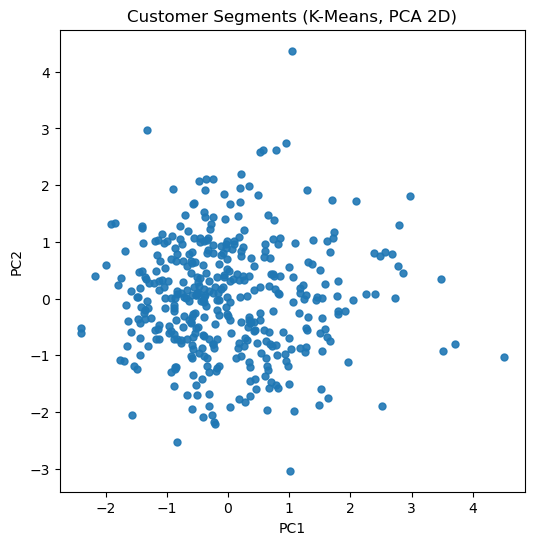

{0: {'n_customers': 93,
  'income_k_mean': 62.62568067910155,
  'orders_per_month_mean': 3.2893435134280287,
  'avg_basket_mean': 32.10735719925492,
  'returns_rate_mean': 0.06525798432255428},
 1: {'n_customers': 46,
  'income_k_mean': 48.49753621638981,
  'orders_per_month_mean': 8.280461804577248,
  'avg_basket_mean': 46.10850029300038,
  'returns_rate_mean': 0.07393095577689461},
 2: {'n_customers': 62,
  'income_k_mean': 46.23436645560961,
  'orders_per_month_mean': 3.102327868968722,
  'avg_basket_mean': 43.00481221633373,
  'returns_rate_mean': 0.1722129797917062},
 3: {'n_customers': 84,
  'income_k_mean': 35.353905947166744,
  'orders_per_month_mean': 2.93941260730682,
  'avg_basket_mean': 34.34328850087288,
  'returns_rate_mean': 0.0625260078627117},
 4: {'n_customers': 32,
  'income_k_mean': 57.035617535769255,
  'orders_per_month_mean': 8.873676123894649,
  'avg_basket_mean': 34.874912251901236,
  'returns_rate_mean': 0.16433985476789148},
 5: {'n_customers': 83,
  'income_

In [7]:

# Simulate a simple customer dataset
n = 400
income = rng.normal(50, 15, n).clip(5, 150)         # in $k
orders_per_month = rng.gamma(shape=2.0, scale=2.0, size=n).clip(0.1, 25)
avg_basket = rng.normal(40, 10, n).clip(5, 200)     # average $ per order
returns_rate = rng.beta(2, 20, size=n)              # 0..1

X_customers = np.c_[income, orders_per_month, avg_basket, returns_rate]

# Scale
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(X_customers)

# Try several K and pick via silhouette
best_K, best_sil = None, -1
for K in range(2, 8):
    km = KMeans(n_clusters=K, random_state=42, n_init=10)
    lbl = km.fit_predict(Xc_scaled)
    sil = silhouette_score(Xc_scaled, lbl)
    if sil > best_sil:
        best_sil, best_K, best_labels, best_model = sil, K, lbl, km

print("Chosen K via silhouette:", best_K, "with score:", round(best_sil, 3))

# Visualize in 2D via PCA
pca2 = PCA(n_components=2, random_state=42)
Xc_2d = pca2.fit_transform(Xc_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(Xc_2d[:, 0], Xc_2d[:, 1], s=25, alpha=0.9)
plt.title("Customer Segments (K-Means, PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Simple segment profiling (means per segment in original scale)
segments = {}
for k in range(best_K):
    idx = best_labels == k
    segments[k] = {
        "n_customers": int(idx.sum()),
        "income_k_mean": float(income[idx].mean()),
        "orders_per_month_mean": float(orders_per_month[idx].mean()),
        "avg_basket_mean": float(avg_basket[idx].mean()),
        "returns_rate_mean": float(returns_rate[idx].mean())
    }

segments



##  Final Summary
- **K-Means**: fast, needs K, prefers spherical clusters. Great for large-scale segmentation.  
- **Hierarchical**: reveals structure via dendrogram; better for exploration and smaller datasets.  
- **DBSCAN**: discovers arbitrarily shaped clusters and outliers using density; tune `eps` and `min_samples`.  
- **Evaluation**: use **Silhouette** and **Elbow**; always **scale features** first for distance-based methods.  

 You now have reproducible demos using `make_blobs`, `make_moons`, and `load_wine`, plus a toy **customer segmentation** pipeline.
